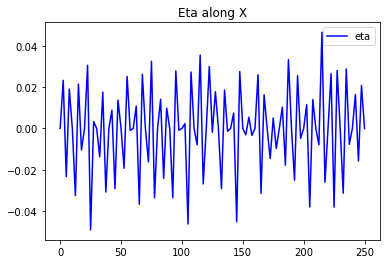

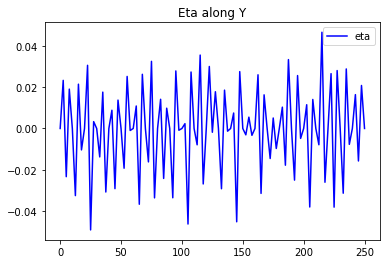

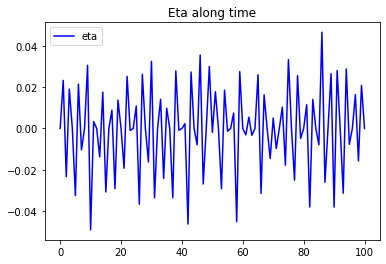

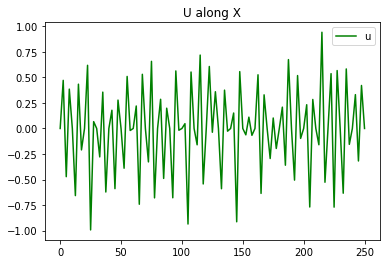

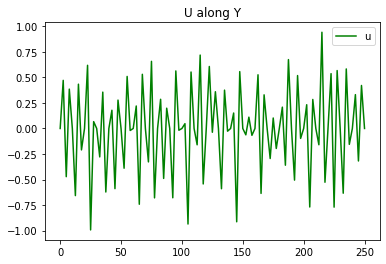

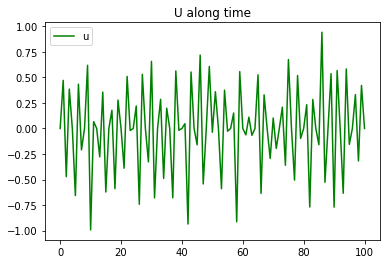

(array([ 0.00000000e+000,  4.71427012e-001, -4.72280273e-001,
         3.85595435e-001,  9.80061063e-017, -6.57652238e-001,
         4.33936524e-001, -2.09915925e-001, -4.73632550e-016,
         6.18803972e-001, -9.93699331e-001,  6.70445812e-002,
         5.91958254e-016, -2.78575833e-001,  3.56156023e-001,
        -6.22393607e-001, -7.33078602e-018,  1.78682002e-001,
        -5.89534225e-001,  2.78094147e-001,  4.78960380e-016,
        -3.89390900e-001,  5.09802625e-001, -1.96310364e-002,
        -2.19798312e-015,  2.20200550e-001, -7.42310715e-001,
         5.30733377e-001, -3.43557605e-016, -3.27462510e-001,
         6.57647001e-001, -6.79885842e-001, -1.00940313e-015,
         2.86041912e-001, -4.89418312e-001,  1.98750768e-001,
         1.53194770e-015, -6.78940957e-001,  5.63709549e-001,
        -1.74097938e-002, -3.52974706e-015,  4.71397870e-002,
        -9.36067315e-001,  5.53152755e-001,  1.65733397e-015,
        -1.59930256e-001,  7.19134074e-001, -5.43547625e-001,
        

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math

g = 9.81 #gravitational acceleration
H = 4000 #taking average ocean depth
c = np.sqrt(g * H) #speed of waves
f_coriolis = 10**(-4) #Coriolis Parameter at 45 latitude
wave_period = 8 #initialising waveperiod as 1
wave_length = 5 #initialising wavelength as 5
kappa = (2*math.pi)/wave_length
w = (2*math.pi)/wave_period
R = c/f_coriolis #Rossby radius of deformation
Xmax=5
Ymax=5

def SWE(dt, dx, dy, tmax=100):
    TimeIterations = int(tmax/dt)
    Xgrid = int(Xmax/dx)
    Ygrid = int(Ymax/dy)
    
    t = np.zeros(TimeIterations + 1)    
    x = np.zeros(TimeIterations + 1)
    y = np.zeros(TimeIterations + 1)
    
    eta_o = np.random.rand(TimeIterations + 1)
    
    u = np.empty(TimeIterations+1)
    eta = np.empty(TimeIterations+1)
    
    for i in range(TimeIterations):
        u[i] = eta_o[i] * np.exp(-y[i] / R) * math.sin((kappa * x[i]) - (w * t[i])) #U(t,X,Y)
        eta[i] = np.sqrt(g/H) * eta_o[i] * np.exp(-y[i] / R) * math.sin((kappa * x[i]) - (w * t[i])) #eta(t,X,Y)
        
        t[i+1] = t[i] + dt
        x[i+1] = x[i] + dx
        y[i+1] = y[i] + dy
    
    plt.plot(Xmax, max(eta))
    plt.plot(x, eta, 'b', label='eta')
    plt.title('Eta along X')
    plt.legend()
    plt.show()
    
    plt.plot(Ymax, max(eta))
    plt.plot(y, eta, 'b', label='eta')
    plt.title('Eta along Y')
    plt.legend()
    plt.show()
    
    plt.plot(tmax, max(eta))
    plt.plot(t, eta, 'b', label='eta')
    plt.title('Eta along time')
    plt.legend()
    plt.show()
        
    plt.plot(Xmax, max(u))
    plt.plot(x, u, 'g', label='u')
    plt.title('U along X')
    plt.legend()
    plt.show()
    
    plt.plot(Ymax, max(u))
    plt.plot(y, u, 'g', label='u')
    plt.title('U along Y')
    plt.legend()
    plt.show()

    plt.plot(tmax, max(u))
    plt.plot(t, u, 'g', label='u')
    plt.title('U along time')
    plt.legend()
    plt.show()
    
    return u, eta
SWE(1, 2.5, 2.5)